testing code: refer to the next section for Random Forest CO Scatterplot and Results

NaN Count = 17
     B/P Ratio  Fuel LTO Cycle (kg)  CO LTO Total Mass (g)  Eng Type_MTF  \
0         2.64            85.000000            2612.000000             0   
1         2.64            92.000000            2254.000000             0   
2         5.23           162.000000            1468.000000             1   
3         5.10           138.000000            1850.000000             1   
4         4.77           157.000000            1865.000000             1   
..         ...                  ...                    ...           ...   
810       5.10           151.000000            2803.000000             0   
811       5.00           583.784452            6415.499422             0   
812       5.00           265.000000            6415.499422             0   
813       4.90           260.000000            6415.499422             0   
814       4.90           274.000000            6415.499422             0   

     Eng Type_TF  
0              1  
1              1  
2              

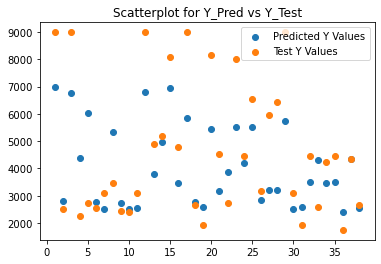

RSME =  1631.912935339296
R2 =  0.5341812185712019


In [16]:
"""
Multi-Linear Regression (Eng Type Included)
"""


# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
#import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')              # Turn off the warnings.
# %matplotlib inline


# Step 2: Import Dataset
ges1 = pd.read_csv("ges.csv")

ges1.rename(columns={"Fuel LTO Cycle (kg)  ":"Fuel LTO Cycle (kg)"}, inplace=True)
shapeGes1 = ges1.shape

gesCO = ges1[['Eng Type','B/P Ratio', 'Fuel LTO Cycle (kg)','CO LTO Total Mass (g)']]
gesCO.to_excel('gesCO_test.xlsx')

gesTest3 = gesCO
print('NaN Count =', gesTest3.isna().sum().sum())

### Option 4: Mean Imputation
gesCO['B/P Ratio'].fillna(gesCO['B/P Ratio'].mean(), inplace=True)
gesCO['Fuel LTO Cycle (kg)'].fillna(gesCO['Fuel LTO Cycle (kg)'].mean(), inplace=True)
gesCO['CO LTO Total Mass (g)'].fillna(gesCO['CO LTO Total Mass (g)'].mean(), inplace=True)


# 3 independent variables (x values)
gesCO1 = pd.get_dummies(gesCO, columns=['Eng Type'])
print(gesCO1)
BpCO = gesCO1['B/P Ratio']
FuelLto = gesCO1['Fuel LTO Cycle (kg)']

#dependent variable (y values)
LtoMassCO = gesCO1['CO LTO Total Mass (g)']

desc = gesCO1.describe(include='all').T

## Select rows based on condition: MTF
gesCO2 = gesCO1[(gesCO1['Eng Type_MTF'] == 1)]
gesCO2 = gesCO2.drop(['Eng Type_TF'],axis=1).values

####### Outlier Treament Applied: IQR Method

LtoMassCO2 = gesCO2[:,2]
outliers = []
def detect_outliers_iqr(LtoMassCO2):
    LtoMassCO2 = sorted(LtoMassCO2)
    q1 = np.percentile(LtoMassCO2, 25)
    q3 = np.percentile(LtoMassCO2, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in LtoMassCO2: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
COMass_outliers = detect_outliers_iqr(LtoMassCO2)

## Version 2: Quantile Based Flooring & Capping for Mass NOx
ten_per = np.percentile(LtoMassCO2,10)
ninety_per = np.percentile(LtoMassCO2,90)
gesCO3 = np.where(gesCO2>ninety_per, ninety_per, gesCO2)


## Detecting outliers using the Inter Quantile Range(IQR)

BpCO2 = gesCO3[:,0]
outliers2 = []
def detect_outliers_iqr(BpCO2):
    BpCO2 = sorted(BpCO2)
    q1_2 = np.percentile(BpCO2, 25)
    q3_2 = np.percentile(BpCO2, 75)
    # print(q1, q3)
    IQR2 = q3_2-q1_2
    lwr_bound_2 = q1_2-(1.5*IQR2)
    upr_bound_2 = q3_2+(1.5*IQR2)
    # print(lwr_bound, upr_bound)
    for i in BpCO2: 
        if (i<lwr_bound_2 or i>upr_bound_2):
            outliers2.append(i)
    return outliers2 # Driver code
BpCO2_outliers = detect_outliers_iqr(BpCO2)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per2 = np.percentile(BpCO2,10)
ninety_per2 = np.percentile(BpCO2,90)
gesCO4 = np.where(gesCO3>ninety_per, ninety_per, gesCO3)



## Detecting outliers using the Inter Quantile Range(IQR)
FuelLto3 = gesCO3[:,1]
outliers3 = []
def detect_outliers_iqr(FuelLto3):
    FuelLto3 = sorted(FuelLto3)
    q1_3 = np.percentile(FuelLto3, 25)
    q3_3 = np.percentile(FuelLto3, 75)
    # print(q1, q3)
    IQR3 = q3_3-q1_3
    lwr_bound_3 = q1_3-(1.5*IQR3)
    upr_bound_3 = q3_3+(1.5*IQR3)
    # print(lwr_bound, upr_bound)
    for i in FuelLto3: 
        if (i<lwr_bound_3 or i>upr_bound_3):
            outliers3.append(i)
    return outliers3 # Driver code
FuelLto3_outliers = detect_outliers_iqr(FuelLto3)

ten_per3 = np.percentile(FuelLto3,10)
ninety_per3 = np.percentile(FuelLto3,90)
gesCO5 = np.where(gesCO4>ninety_per, ninety_per, gesCO4)

gesCO6 = np.delete(gesCO5,2,axis=1)
x = gesCO6
y = gesCO5[:,2]


## Step 4: Split dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Step 5: Train the model on the training set
from sklearn.linear_model import LinearRegression as lr
ml=lr()
ml.fit(x_train,y_train)

## Step 6: Predict the test set results
y_pred = ml.predict(x_test)
lenY = len(y_pred)
#print(y_pred)

# Scatterplot
list2 = np.linspace(1,lenY,lenY)
plt.scatter(list2,y_pred,label='Predicted Y Values')
plt.scatter(list2,y_test,label='Test Y Values')

# Label Plot
plt.title('Scatterplot for Y_Pred vs Y_Test')
plt.legend()
plt.show()

# Get the RMSE and R2 Score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
#r2score = ml.score(x_test,y_test) #another way to calculate R2

print('RSME = ', rmse)
print('R2 = ', r2score)

RANDOM FOREST REGRESSION

R-squared score: 0.39288479745445337
RMSE: 4759.232277810879


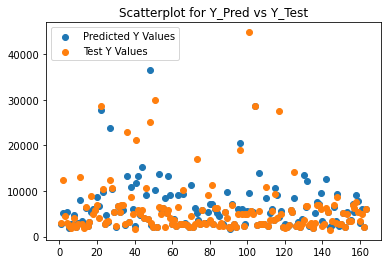

In [3]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')              # Turn off the warnings.
# %matplotlib inline


# Step 2: Import Dataset
ges1 = pd.read_csv("ges.csv")

ges1.rename(columns={"Fuel LTO Cycle (kg)  ":"Fuel LTO Cycle (kg)"}, inplace=True)
shapeGes1 = ges1.shape

gesCO = ges1[['Eng Type','B/P Ratio', 'Fuel LTO Cycle (kg)','CO LTO Total Mass (g)']]
gesCO.to_excel('gesCO_test.xlsx')

gesTest3 = gesCO
# print('NaN Count =', gesTest3.isna().sum().sum())


### Option 4: Mean Imputation
gesCO['B/P Ratio'].fillna(gesCO['B/P Ratio'].mean(), inplace=True)
gesCO['Fuel LTO Cycle (kg)'].fillna(gesCO['Fuel LTO Cycle (kg)'].mean(), inplace=True)
gesCO['CO LTO Total Mass (g)'].fillna(gesCO['CO LTO Total Mass (g)'].mean(), inplace=True)

# 3 independent variables (x values)
#dummy encoding for engine type
gesCO1 = pd.get_dummies(gesCO, columns=['Eng Type'])
BpCO = gesCO1['B/P Ratio']
FuelLto = gesCO1['Fuel LTO Cycle (kg)']

#dependent variable (y values)
LtoMassCO = gesCO1['CO LTO Total Mass (g)']

desc = gesCO1.describe(include='all').T

### Choose either TF or MTF:


## Select rows based on condition: MTF
gesCO2 = gesCO1[(gesCO1['Eng Type_MTF'] == 1)]
## Drop the Eng Type_TF column from df
gesCO2 = gesCO2.drop(['Eng Type_TF'],axis=1).values


####### Outlier Treament Applied: IQR Method

## Detecting outliers using the Inter Quantile Range(IQR)
## (1) Doing this for LTO Mass for HC
LtoMassCO2 = gesCO2[:,2]
outliers = []
def detect_outliers_iqr(LtoMassCO2):
    LtoMassCO2 = sorted(LtoMassCO2)
    q1 = np.percentile(LtoMassCO2, 25)
    q3 = np.percentile(LtoMassCO2, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in LtoMassCO2: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
COMass_outliers = detect_outliers_iqr(LtoMassCO2)
# print("Mass CO Outliers from IQR method: ", COMass_outliers)


## Version 2: Quantile Based Flooring & Capping for Mass NOx
ten_per = np.percentile(LtoMassCO2,10)
ninety_per = np.percentile(LtoMassCO2,90)
gesCO3 = np.where(gesCO2>ninety_per, ninety_per, gesCO2)


## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for B/P Ratio for NOx
BpCO2 = gesCO3[:,0]
outliers2 = []
def detect_outliers_iqr(BpCO2):
    BpCO2 = sorted(BpCO2)
    q1_2 = np.percentile(BpCO2, 25)
    q3_2 = np.percentile(BpCO2, 75)
    # print(q1, q3)
    IQR2 = q3_2-q1_2
    lwr_bound_2 = q1_2-(1.5*IQR2)
    upr_bound_2 = q3_2+(1.5*IQR2)
    # print(lwr_bound, upr_bound)
    for i in BpCO2: 
        if (i<lwr_bound_2 or i>upr_bound_2):
            outliers2.append(i)
    return outliers2 # Driver code
BpCO2_outliers = detect_outliers_iqr(BpCO2)
# print("B/P Ratio Outliers from IQR method: ", BpCO2_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per2 = np.percentile(BpCO2,10)
ninety_per2 = np.percentile(BpCO2,90)
gesCO4 = np.where(gesCO3>ninety_per, ninety_per, gesCO3)



## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for Fuel LTO Cycle for NOx
FuelLto3 = gesCO3[:,1]
outliers3 = []
def detect_outliers_iqr(FuelLto3):
    FuelLto3 = sorted(FuelLto3)
    q1_3 = np.percentile(FuelLto3, 25)
    q3_3 = np.percentile(FuelLto3, 75)
    # print(q1, q3)
    IQR3 = q3_3-q1_3
    lwr_bound_3 = q1_3-(1.5*IQR3)
    upr_bound_3 = q3_3+(1.5*IQR3)
    # print(lwr_bound, upr_bound)
    for i in FuelLto3: 
        if (i<lwr_bound_3 or i>upr_bound_3):
            outliers3.append(i)
    return outliers3 # Driver code
FuelLto3_outliers = detect_outliers_iqr(FuelLto3)
# print("Fuel LTO Cycle Outliers from IQR method: ", FuelLto3_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per3 = np.percentile(FuelLto3,10)
ninety_per3 = np.percentile(FuelLto3,90)
gesCO5 = np.where(gesCO4>ninety_per, ninety_per, gesCO4)


### Step 3: Define x and y (w/ Outlier Treatment)
# #get x and y values
gesCO6 = np.delete(gesCO5,2,axis=1)
x = gesCO6
y = gesCO5[:,2]


# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(gesCO1.drop(columns=['CO LTO Total Mass (g)']), 
                                                    gesCO1['CO LTO Total Mass (g)'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting the values for test set
y_pred = rf_model.predict(X_test)
lenY = len(y_pred)

# Checking the performance of the model
print('R-squared score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Scatterplot
list2 = np.linspace(1,lenY,lenY)
plt.scatter(list2,y_pred,label='Predicted Y Values')
plt.scatter(list2,y_test,label='Test Y Values')

# Label Plot
plt.title('Scatterplot for Y_Pred vs Y_Test')
plt.legend()
plt.show()



R-squared score: 0.39288479745445337
RMSE: 4759.232277810879


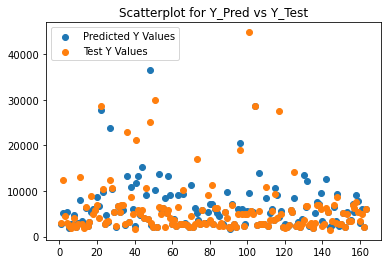

In [4]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')              # Turn off the warnings.
# %matplotlib inline


# Step 2: Import Dataset
ges1 = pd.read_csv("ges.csv")

ges1.rename(columns={"Fuel LTO Cycle (kg)  ":"Fuel LTO Cycle (kg)"}, inplace=True)
shapeGes1 = ges1.shape

gesCO = ges1[['Eng Type','B/P Ratio', 'Fuel LTO Cycle (kg)','CO LTO Total Mass (g)']]
gesCO.to_excel('gesCO_test.xlsx')

gesTest3 = gesCO
# print('NaN Count =', gesTest3.isna().sum().sum())


### Option 4: Mean Imputation
gesCO['B/P Ratio'].fillna(gesCO['B/P Ratio'].mean(), inplace=True)
gesCO['Fuel LTO Cycle (kg)'].fillna(gesCO['Fuel LTO Cycle (kg)'].mean(), inplace=True)
gesCO['CO LTO Total Mass (g)'].fillna(gesCO['CO LTO Total Mass (g)'].mean(), inplace=True)

# 3 independent variables (x values)
#dummy encoding for engine type
gesCO1 = pd.get_dummies(gesCO, columns=['Eng Type'])
BpCO = gesCO1['B/P Ratio']
FuelLto = gesCO1['Fuel LTO Cycle (kg)']

#dependent variable (y values)
LtoMassCO = gesCO1['CO LTO Total Mass (g)']

desc = gesCO1.describe(include='all').T

### Choose either TF or MTF:


## Select rows based on condition: MTF
gesCO2 = gesCO1[(gesCO1['Eng Type_MTF'] == 0)]
## Drop the Eng Type_TF column from df
gesCO2 = gesCO2.drop(['Eng Type_TF'],axis=1).values


####### Outlier Treament Applied: IQR Method

## Detecting outliers using the Inter Quantile Range(IQR)
## (1) Doing this for LTO Mass for HC
LtoMassCO2 = gesCO2[:,2]
outliers = []
def detect_outliers_iqr(LtoMassCO2):
    LtoMassCO2 = sorted(LtoMassCO2)
    q1 = np.percentile(LtoMassCO2, 25)
    q3 = np.percentile(LtoMassCO2, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in LtoMassCO2: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
COMass_outliers = detect_outliers_iqr(LtoMassCO2)
# print("Mass CO Outliers from IQR method: ", COMass_outliers)


## Version 2: Quantile Based Flooring & Capping for Mass NOx
ten_per = np.percentile(LtoMassCO2,10)
ninety_per = np.percentile(LtoMassCO2,90)
gesCO3 = np.where(gesCO2>ninety_per, ninety_per, gesCO2)


## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for B/P Ratio for NOx
BpCO2 = gesCO3[:,0]
outliers2 = []
def detect_outliers_iqr(BpCO2):
    BpCO2 = sorted(BpCO2)
    q1_2 = np.percentile(BpCO2, 25)
    q3_2 = np.percentile(BpCO2, 75)
    # print(q1, q3)
    IQR2 = q3_2-q1_2
    lwr_bound_2 = q1_2-(1.5*IQR2)
    upr_bound_2 = q3_2+(1.5*IQR2)
    # print(lwr_bound, upr_bound)
    for i in BpCO2: 
        if (i<lwr_bound_2 or i>upr_bound_2):
            outliers2.append(i)
    return outliers2 # Driver code
BpCO2_outliers = detect_outliers_iqr(BpCO2)
# print("B/P Ratio Outliers from IQR method: ", BpCO2_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per2 = np.percentile(BpCO2,10)
ninety_per2 = np.percentile(BpCO2,90)
gesCO4 = np.where(gesCO3>ninety_per, ninety_per, gesCO3)



## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for Fuel LTO Cycle for NOx
FuelLto3 = gesCO3[:,1]
outliers3 = []
def detect_outliers_iqr(FuelLto3):
    FuelLto3 = sorted(FuelLto3)
    q1_3 = np.percentile(FuelLto3, 25)
    q3_3 = np.percentile(FuelLto3, 75)
    # print(q1, q3)
    IQR3 = q3_3-q1_3
    lwr_bound_3 = q1_3-(1.5*IQR3)
    upr_bound_3 = q3_3+(1.5*IQR3)
    # print(lwr_bound, upr_bound)
    for i in FuelLto3: 
        if (i<lwr_bound_3 or i>upr_bound_3):
            outliers3.append(i)
    return outliers3 # Driver code
FuelLto3_outliers = detect_outliers_iqr(FuelLto3)
# print("Fuel LTO Cycle Outliers from IQR method: ", FuelLto3_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per3 = np.percentile(FuelLto3,10)
ninety_per3 = np.percentile(FuelLto3,90)
gesCO5 = np.where(gesCO4>ninety_per, ninety_per, gesCO4)


### Step 3: Define x and y (w/ Outlier Treatment)
# #get x and y values
gesCO6 = np.delete(gesCO5,2,axis=1)
x = gesCO6
y = gesCO5[:,2]


# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(gesCO1.drop(columns=['CO LTO Total Mass (g)']), 
                                                    gesCO1['CO LTO Total Mass (g)'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting the values for test set
y_pred = rf_model.predict(X_test)
lenY = len(y_pred)

# Checking the performance of the model
print('R-squared score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Scatterplot
list2 = np.linspace(1,lenY,lenY)
plt.scatter(list2,y_pred,label='Predicted Y Values')
plt.scatter(list2,y_test,label='Test Y Values')

# Label Plot
plt.title('Scatterplot for Y_Pred vs Y_Test')
plt.legend()
plt.show()



In [8]:
ges1.head()

,Unnamed: 0,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.60,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.50,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.73,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.50,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.91,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [10]:
ges1['Eng Type']

0       TF
1       TF
2      MTF
3      MTF
4      MTF
      ... 
810     TF
811     TF
812     TF
813     TF
814     TF
Name: Eng Type, Length: 815, dtype: object

In [12]:
gesCO1

,B/P Ratio,Fuel LTO Cycle (kg),NOx LTO Total mass (g),Eng Type_MTF,Eng Type_TF
0,2.64,85.000000,630.000000,0,1
1,2.64,92.000000,845.000000,0,1
2,5.23,162.000000,1563.000000,1,0
3,5.10,138.000000,1175.000000,1,0
4,4.77,157.000000,1456.000000,1,0
...,...,...,...,...,...
810,5.10,151.000000,1086.000000,0,1
811,5.00,583.784452,9396.249398,0,1
812,5.00,265.000000,9396.249398,0,1
813,4.90,260.000000,9396.249398,0,1


RANDOM FOREST NOx 

R-squared score: 0.9740980012329966
RMSE: 1319.2932839008251


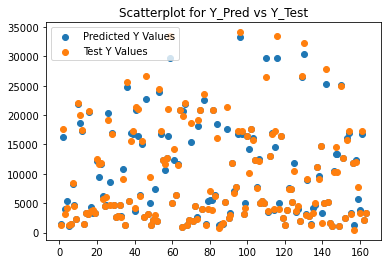

In [15]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')              # Turn off the warnings.
# %matplotlib inline


# Step 2: Import Dataset
ges1 = pd.read_csv("ges.csv")


ges1.rename(columns={"Fuel LTO Cycle (kg)  ":"Fuel LTO Cycle (kg)"}, inplace=True)
shapeGes1 = ges1.shape

gesNO = ges1[['Eng Type','B/P Ratio', 'Fuel LTO Cycle (kg)','NOx LTO Total mass (g)']]
gesNO.to_excel('gesNOx_test.xlsx')

gesTest3 = gesNO
# print('NaN Count =', gesTest3.isna().sum().sum())


### Option 4: Mean Imputation
gesNO['B/P Ratio'].fillna(gesNO['B/P Ratio'].mean(), inplace=True)
gesNO['Fuel LTO Cycle (kg)'].fillna(gesNO['Fuel LTO Cycle (kg)'].mean(), inplace=True)
gesNO['NOx LTO Total mass (g)'].fillna(gesNO['NOx LTO Total mass (g)'].mean(), inplace=True)

# 3 independent variables (x values)
#dummy encoding for engine type
gesNO1 = pd.get_dummies(gesCO, columns=['Eng Type'])
BpNO = gesNO1['B/P Ratio']
FuelLto = gesNO1['Fuel LTO Cycle (kg)']

#dependent variable (y values)
LtoMassCO = gesNO1['NOx LTO Total mass (g)']

desc = gesNO1.describe(include='all').T

### Choose either TF or MTF:


## Select rows based on condition: MTF
gesNO2 = gesNO1[(gesNO1['Eng Type_MTF'] == 1)]
#print(gesNO2)
## Drop the Eng Type_TF column from df
gesNO2 = gesNO2.drop(['Eng Type_TF'],axis=1).values
## print(gesNO2)

# ## Select rows based on condition: TF
# gesNO2 = gesNO1[(gesNO1['Eng Type_TF'] == 1)]
# #print(gesNO2)
# ## Drop the Eng Type_MTF column from df
# gesNO2 = gesNO2.drop(['Eng Type_MTF'],axis=1).values
# #print(gesNO2)


####### Outlier Treament Applied: IQR Method

## Detecting outliers using the Inter Quantile Range(IQR)
## (1) Doing this for LTO Mass for HC
LtoMassNO2 = gesNO2[:,2]
outliers = []
def detect_outliers_iqr(LtoMassNO2):
    LtoMassNO2 = sorted(LtoMassNO2)
    q1 = np.percentile(LtoMassNO2, 25)
    q3 = np.percentile(LtoMassNO2, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in LtoMassNO2: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
NOMass_outliers = detect_outliers_iqr(LtoMassNO2)
# print("Mass CO Outliers from IQR method: ", COMass_outliers)


## Version 2: Quantile Based Flooring & Capping for Mass NOx
ten_per = np.percentile(LtoMassNO2,10)
ninety_per = np.percentile(LtoMassNO2,90)
gesNO3 = np.where(gesNO2>ninety_per, ninety_per, gesNO2)


## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for B/P Ratio for NOx
BpNO2 = gesNO3[:,0]
outliers2 = []
def detect_outliers_iqr(BpNO2):
    BpNO2 = sorted(BpNO2)
    q1_2 = np.percentile(BpNO2, 25)
    q3_2 = np.percentile(BpNO2, 75)
    # print(q1, q3)
    IQR2 = q3_2-q1_2
    lwr_bound_2 = q1_2-(1.5*IQR2)
    upr_bound_2 = q3_2+(1.5*IQR2)
    # print(lwr_bound, upr_bound)
    for i in BpNO2: 
        if (i<lwr_bound_2 or i>upr_bound_2):
            outliers2.append(i)
    return outliers2 # Driver code
BpNO2_outliers = detect_outliers_iqr(BpNO2)
# print("B/P Ratio Outliers from IQR method: ", BpCO2_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per2 = np.percentile(BpNO2,10)
ninety_per2 = np.percentile(BpNO2,90)
gesNO4 = np.where(gesNO3>ninety_per, ninety_per, gesNO3)



## Detecting outliers using the Inter Quantile Range(IQR)
## (2) Doing this for Fuel LTO Cycle for NOx
FuelLto3 = gesNO3[:,1]
outliers3 = []
def detect_outliers_iqr(FuelLto3):
    FuelLto3 = sorted(FuelLto3)
    q1_3 = np.percentile(FuelLto3, 25)
    q3_3 = np.percentile(FuelLto3, 75)
    # print(q1, q3)
    IQR3 = q3_3-q1_3
    lwr_bound_3 = q1_3-(1.5*IQR3)
    upr_bound_3 = q3_3+(1.5*IQR3)
    # print(lwr_bound, upr_bound)
    for i in FuelLto3: 
        if (i<lwr_bound_3 or i>upr_bound_3):
            outliers3.append(i)
    return outliers3 # Driver code
FuelLto3_outliers = detect_outliers_iqr(FuelLto3)
# print("Fuel LTO Cycle Outliers from IQR method: ", FuelLto3_outliers)


## Version 2: Quantile Based Flooring & Capping for B/P Ratio
ten_per3 = np.percentile(FuelLto3,10)
ninety_per3 = np.percentile(FuelLto3,90)
gesNO5 = np.where(gesNO4>ninety_per, ninety_per, gesNO4)


### Step 3: Define x and y (w/ Outlier Treatment)
# #get x and y values
gesNO6 = np.delete(gesNO5,2,axis=1)
x = gesNO6
y = gesNO5[:,2]


# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(gesNO1.drop(columns=['NOx LTO Total mass (g)']), 
                                                    gesNO1['NOx LTO Total mass (g)'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting the values for test set
y_pred = rf_model.predict(X_test)
lenY = len(y_pred)

# Checking the performance of the model
print('R-squared score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Scatterplot
list2 = np.linspace(1,lenY,lenY)
plt.scatter(list2,y_pred,label='Predicted Y Values')
plt.scatter(list2,y_test,label='Test Y Values')

# Label Plot
plt.title('Scatterplot for Y_Pred vs Y_Test')
plt.legend()